In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import tensorflow as tf
import os
import seaborn as sns
import pathlib

from keras import backend as K
from PIL import Image
from random import sample
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:

dataset_path ={"train_path" : "/content/drive/MyDrive/annapoorani/train",
             "valid_path" : "/content/drive/MyDrive/annapoorani/valid",
             }

all_data = []


for path in dataset_path.values():
    data = {"img_path": [] , "label": [] }
    labels = os.listdir(path)

    for label in labels:
        folder_path = os.path.join(path, label)
        if os.path.isdir(folder_path):
            file_names = os.listdir(folder_path)
            for file_name in file_names:
                img_path = os.path.join(folder_path, file_name)
                data["img_path"].append(img_path)
                data["label"].append(label)

    all_data.append(data.copy())
    data.clear()


In [ ]:
train_df = pd.DataFrame.from_dict(all_data[0])
valid_df = pd.DataFrame.from_dict(all_data[1])



In [ ]:
lbe = LabelEncoder()
train_df['encoded_label'] = lbe.fit_transform(train_df['label'])
valid_df['encoded_label'] = lbe.fit_transform(valid_df['label'])

list_class = dict(zip(lbe.classes_, lbe.transform(lbe.classes_)))
num_of_class = len(list_class)


In [ ]:
train_df['label'].value_counts(normalize=False)

Cattle-Egret           27
Gray-Wagtail           26
Common-Myna            26
brown headed           20
Common-Kingfisher      18
Common-Rosefinch       17
Common-Tailorbird      17
Indian-Grey-Horn       16
Forest-Wagtail         15
Coppersmith-Barbe      14
Indian-Peacock         12
Indian-Pitta           12
Jungle-Babbler         12
Northern-Lapwing       11
House-Crow             10
Indian-Roller          10
hoopoe                  9
White-Breasted-Wat      9
Red-Wattled-Lapwin      8
Ruddy-Shelduck          8
Rufous-Treepie          7
Sarus-Crane             7
White-Breasted          7
Brown-Headed-Barbet     5
White-Wagtail           5
Name: label, dtype: int64

In [ ]:
valid_df['label'].value_counts(normalize=False)

Cattle-Egret           27
Gray-Wagtail           26
Common-Myna            26
brown headed           20
Common-Kingfisher      18
Common-Rosefinch       17
Common-Tailorbird      17
Indian-Grey-Horn       16
Forest-Wagtail         15
Coppersmith-Barbe      14
Indian-Peacock         12
Indian-Pitta           12
Jungle-Babbler         12
Northern-Lapwing       11
House-Crow             10
Indian-Roller          10
hoopoe                  9
White-Breasted-Wat      9
Red-Wattled-Lapwin      8
Ruddy-Shelduck          8
Rufous-Treepie          7
Sarus-Crane             7
White-Breasted          7
Brown-Headed-Barbet     5
White-Wagtail           5
Name: label, dtype: int64

In [ ]:
df = pd.concat([train_df, valid_df], ignore_index=True)
df

,img_path,label,encoded_label
0,/content/drive/MyDrive/annapoorani/train/brown...,brown headed,23
1,/content/drive/MyDrive/annapoorani/train/brown...,brown headed,23
2,/content/drive/MyDrive/annapoorani/train/brown...,brown headed,23
3,/content/drive/MyDrive/annapoorani/train/brown...,brown headed,23
4,/content/drive/MyDrive/annapoorani/train/brown...,brown headed,23
...,...,...,...
651,/content/drive/MyDrive/annapoorani/valid/White...,White-Wagtail,22
652,/content/drive/MyDrive/annapoorani/valid/White...,White-Wagtail,22
653,/content/drive/MyDrive/annapoorani/valid/White...,White-Wagtail,22
654,/content/drive/MyDrive/annapoorani/valid/White...,White-Wagtail,22


In [ ]:
df['label'].value_counts()

Cattle-Egret           54
Gray-Wagtail           52
Common-Myna            52
brown headed           40
Common-Kingfisher      36
Common-Rosefinch       34
Common-Tailorbird      34
Indian-Grey-Horn       32
Forest-Wagtail         30
Coppersmith-Barbe      28
Indian-Peacock         24
Indian-Pitta           24
Jungle-Babbler         24
Northern-Lapwing       22
House-Crow             20
Indian-Roller          20
hoopoe                 18
White-Breasted-Wat     18
Red-Wattled-Lapwin     16
Ruddy-Shelduck         16
Rufous-Treepie         14
Sarus-Crane            14
White-Breasted         14
Brown-Headed-Barbet    10
White-Wagtail          10
Name: label, dtype: int64

In [ ]:
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train_df, test_df = train_test_split(train_df, test_size=0.1, random_state=42, stratify=train_df['label'])

train_df

,img_path,label,encoded_label
173,/content/drive/MyDrive/annapoorani/train/Gray-...,Gray-Wagtail,8
655,/content/drive/MyDrive/annapoorani/valid/White...,White-Wagtail,22
157,/content/drive/MyDrive/annapoorani/train/Fores...,Forest-Wagtail,7
159,/content/drive/MyDrive/annapoorani/train/Gray-...,Gray-Wagtail,8
624,/content/drive/MyDrive/annapoorani/valid/Rufou...,Rufous-Treepie,18
...,...,...,...
18,/content/drive/MyDrive/annapoorani/train/brown...,brown headed,23
122,/content/drive/MyDrive/annapoorani/train/Commo...,Common-Tailorbird,5
195,/content/drive/MyDrive/annapoorani/train/House...,House-Crow,9
633,/content/drive/MyDrive/annapoorani/valid/Sarus...,Sarus-Crane,19


In [ ]:
train_df['label'].value_counts()

Cattle-Egret           39
Gray-Wagtail           38
Common-Myna            38
brown headed           29
Common-Kingfisher      26
Common-Rosefinch       24
Common-Tailorbird      24
Indian-Grey-Horn       23
Forest-Wagtail         21
Coppersmith-Barbe      20
Jungle-Babbler         17
Indian-Pitta           17
Indian-Peacock         17
Northern-Lapwing       16
Indian-Roller          14
House-Crow             14
hoopoe                 13
White-Breasted-Wat     13
Ruddy-Shelduck         12
Red-Wattled-Lapwin     12
White-Breasted         10
Rufous-Treepie         10
Sarus-Crane            10
White-Wagtail           7
Brown-Headed-Barbet     7
Name: label, dtype: int64

In [ ]:
valid_df['label'].value_counts()

Cattle-Egret           11
Gray-Wagtail           10
Common-Myna            10
brown headed            8
Common-Tailorbird       7
Common-Rosefinch        7
Common-Kingfisher       7
Forest-Wagtail          6
Indian-Grey-Horn        6
Coppersmith-Barbe       6
Jungle-Babbler          5
Indian-Peacock          5
Indian-Pitta            5
White-Breasted-Wat      4
Indian-Roller           4
Northern-Lapwing        4
House-Crow              4
hoopoe                  4
White-Breasted          3
Red-Wattled-Lapwin      3
Sarus-Crane             3
Ruddy-Shelduck          3
Rufous-Treepie          3
White-Wagtail           2
Brown-Headed-Barbet     2
Name: label, dtype: int64

In [ ]:
test_df['label'].value_counts()

Gray-Wagtail           4
Cattle-Egret           4
Common-Myna            4
Forest-Wagtail         3
brown headed           3
Indian-Grey-Horn       3
Common-Tailorbird      3
Common-Kingfisher      3
Common-Rosefinch       3
Indian-Roller          2
Jungle-Babbler         2
Coppersmith-Barbe      2
Northern-Lapwing       2
House-Crow             2
Indian-Pitta           2
Indian-Peacock         2
White-Wagtail          1
hoopoe                 1
White-Breasted-Wat     1
White-Breasted         1
Sarus-Crane            1
Brown-Headed-Barbet    1
Red-Wattled-Lapwin     1
Ruddy-Shelduck         1
Rufous-Treepie         1
Name: label, dtype: int64

25


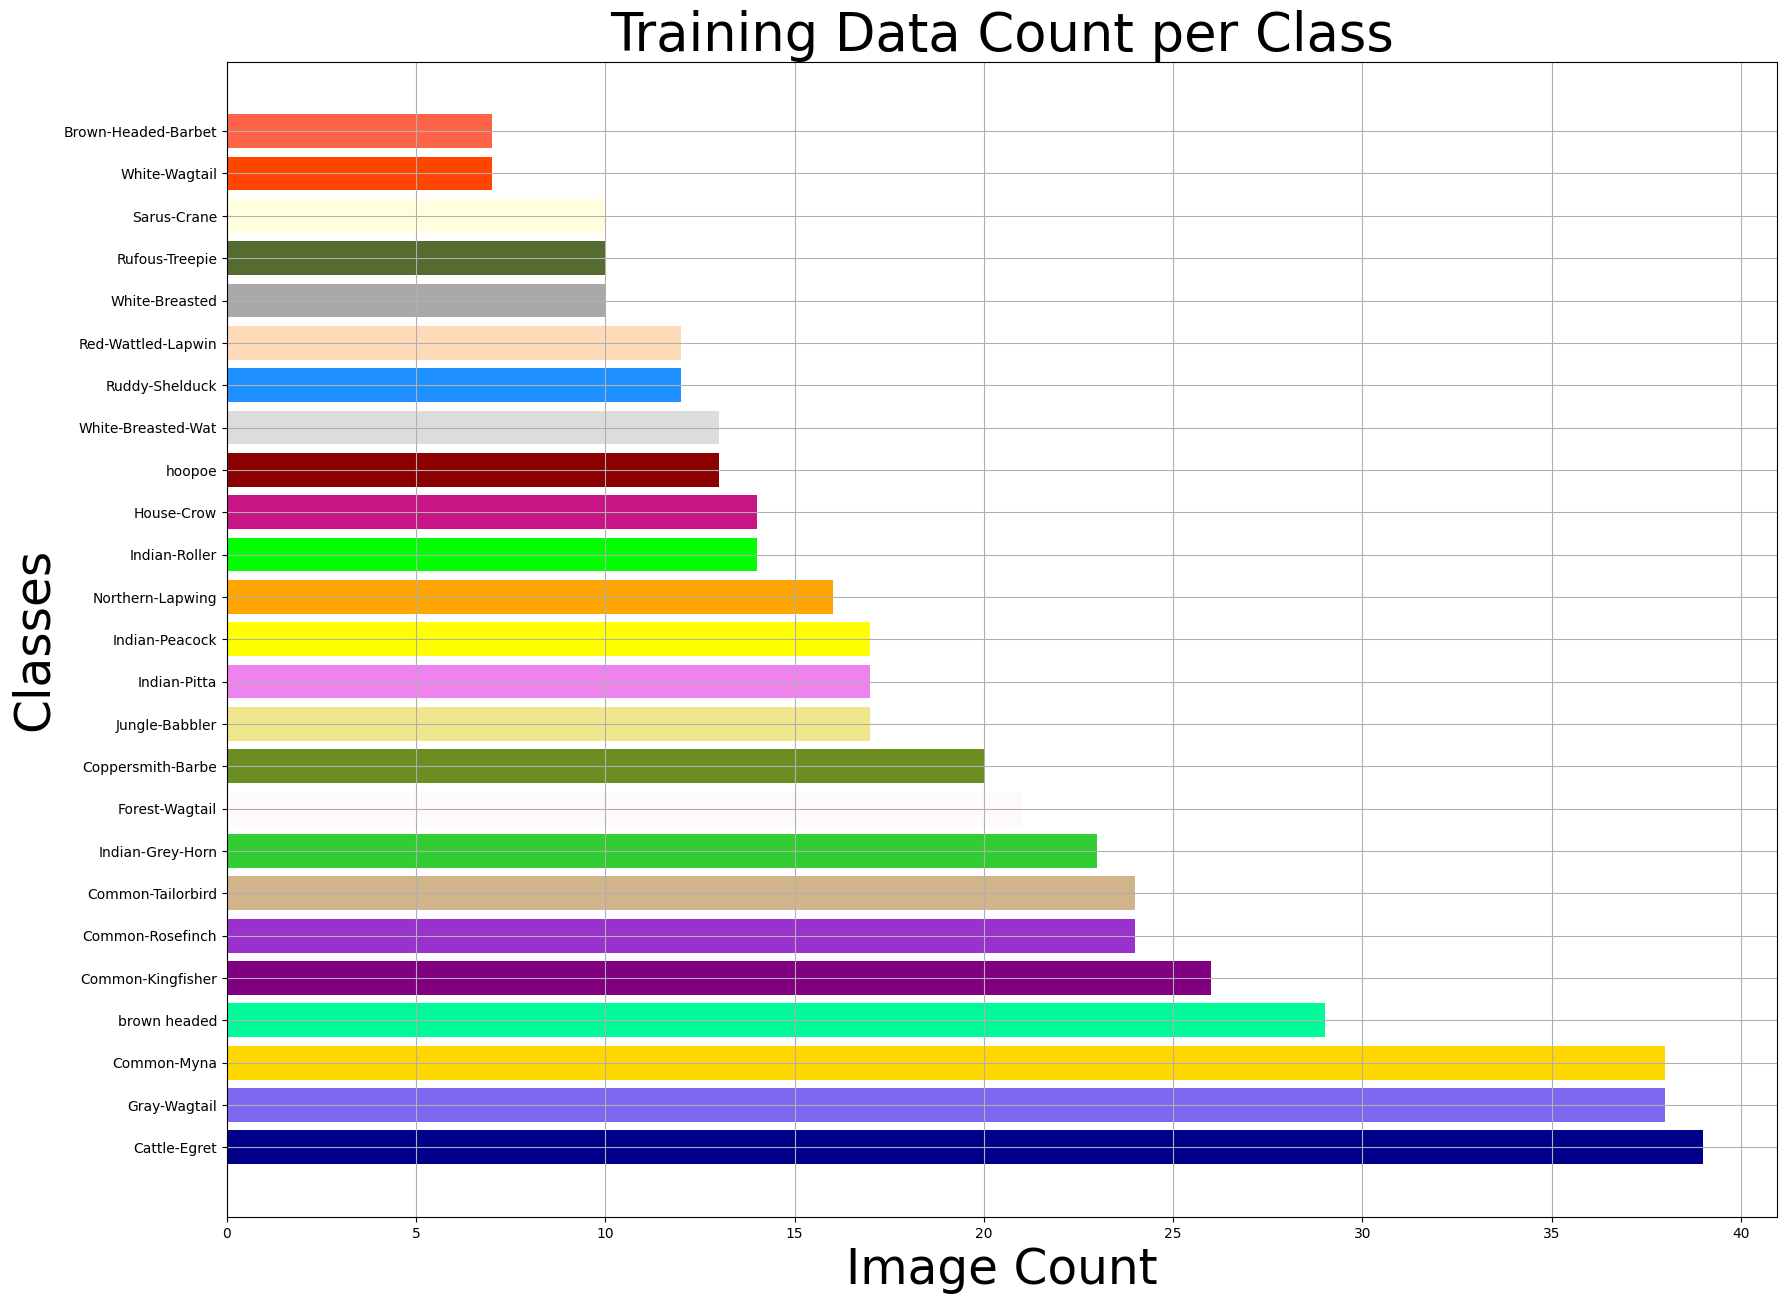

In [ ]:
train  = train_df["label"].value_counts()
# print(train)
label = train.tolist()

index = train.index.tolist()

all_colors = [k for k,v in pltc.cnames.items()]
colors = sample(all_colors, num_of_class)
print(num_of_class)
plt.figure(figsize=(20,15))
plt.title("Training Data Count per Class",fontsize=38)
plt.xlabel('Image Count', fontsize=35)
plt.ylabel('Classes', fontsize=35)
plt.barh(index, label, color=colors)
plt.grid(True)
plt.show()

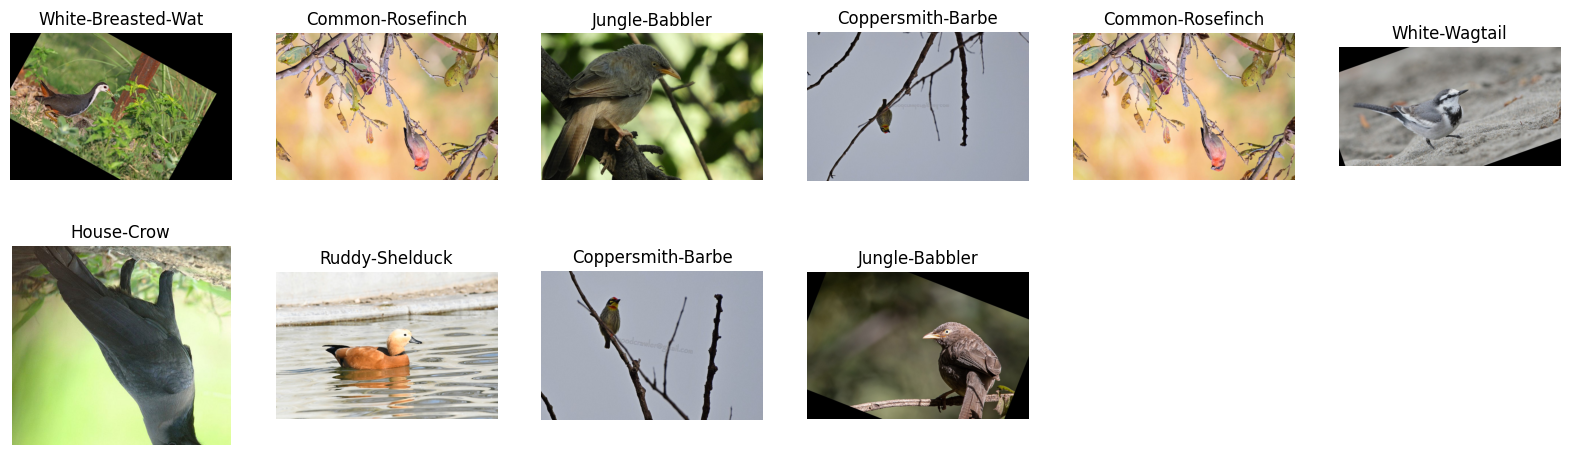

In [ ]:
plt.figure(figsize=(20,15))
for i, row in valid_df.sample(n=10).reset_index().iterrows():
    plt.subplot(5,6,i+1)
    image_path = row['img_path']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["label"])
    plt.axis('off')

plt.show()

In [ ]:
batch_size = 32
img_height, img_width = 224, 224

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
#     rescale = 1./255
)

In [ ]:
def load_data(df):
    return generator.flow_from_dataframe(
        dataframe=df,
        x_col='img_path',
        y_col='label',
        target_size=(img_height, img_width),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=False,
        seed=42,
    )
train_images = load_data(train_df)
val_images = load_data(valid_df)
test_images = load_data(test_df)

Found 467 validated image filenames belonging to 25 classes.
Found 132 validated image filenames belonging to 25 classes.
Found 53 validated image filenames belonging to 25 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 4 invalid image filename(s) in x_col="img_path". These filename(s) will be ignored.
  warnings.warn(


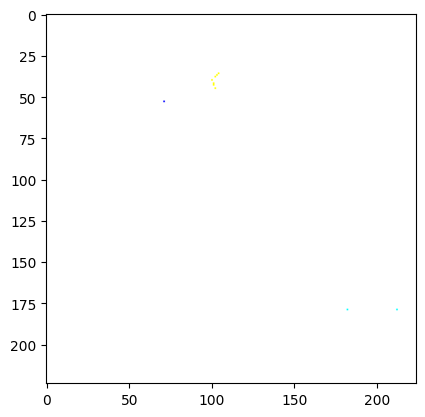

In [ ]:
test_img, test_labels = next(test_images)
plt.imshow(test_img[0])

In [ ]:

train_images[i][1][0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

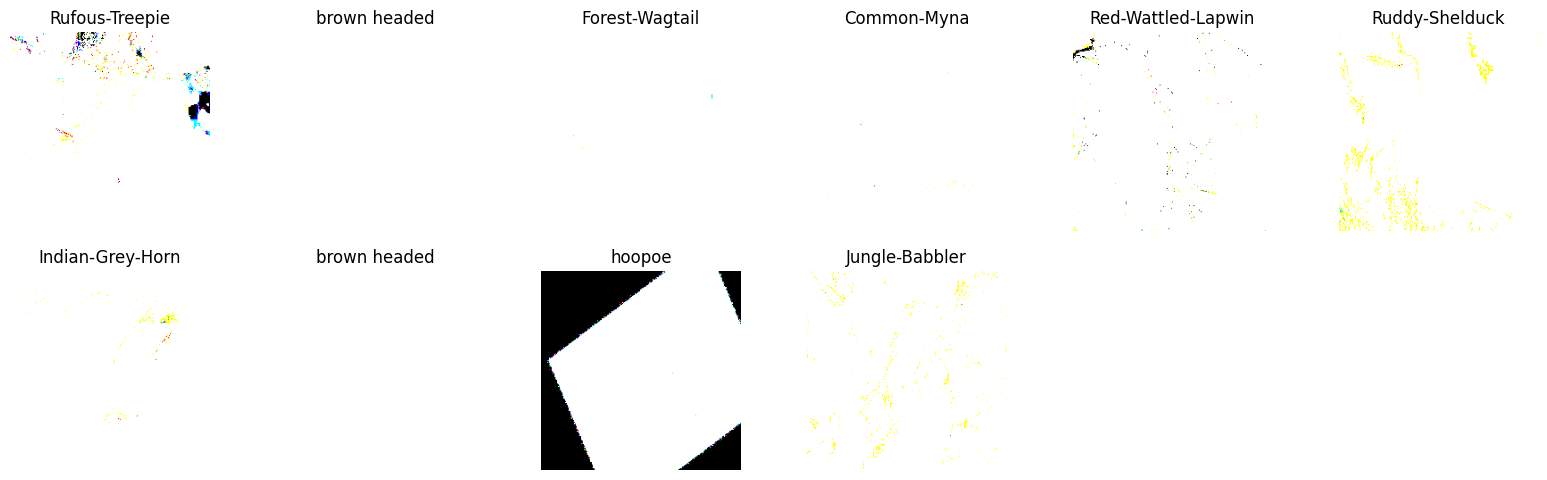

In [ ]:
plt.figure(figsize=(20,15))
for i, row in valid_df.sample(n=10).reset_index().iterrows():
    plt.subplot(5,6,i+1)
    plt.imshow(train_images[i][0][0])
    plt.title(row["label"])
    plt.axis('off')

plt.show()


In [ ]:

effnet = tf.keras.applications.EfficientNetB3(include_top=False, weights='imagenet')


In [ ]:
for i, layer in enumerate(effnet.layers):
    effnet.layers[i].trainable = False

In [ ]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2*((precisions*recalls)/(precisions+recalls+K.epsilon()))

In [ ]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1)
], name='augmentation_layers')

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(img_height, img_width, 3)))
model.add(augmentation)
model.add(effnet)
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling2D())
model.add(tf.keras.layers.Dense(num_of_class, activation='softmax'))

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', f1, precision, recall]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 augmentation_layers (Seque  (None, 224, 224, 3)       0         
 ntial)                                                          
                                                                 
 efficientnetb3 (Functional  (None, None, None, 1536   10783535  
 )                           )                                   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 1536)        0         
 g2D)                                                            
                                                                 
 dense_4 (Dense)             (None, 3, 3, 256)         393472    
                                                                 
 global_max_pooling2d_2 (Gl  (None, 256)               0         
 obalMaxPooling2D)                                    

In [ ]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                        patience=3,
                                        verbose=1,
                                        factor=0.2,
                                        min_lr=0.000003)

es = tf.keras.callbacks.EarlyStopping(monitor= 'val_acc',
                                      patience= 4 ,
                                      restore_best_weights= True,
                                      verbose=1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./saved_model/best_weights.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks = [learning_rate_reduction, es, model_checkpoint]

In [ ]:
history_tl = model.fit(train_images,
                    steps_per_epoch=len(train_images),
                    validation_data=val_images,
                    validation_steps=len(val_images),
                    epochs=8,
                    verbose=1,
                    callbacks=[callbacks]
                   )

model.save_weights('./saved_model/my_checkpoint_tflr')
model.save('./saved_model/final_model_transfer_learning.keras')

Epoch 1/8
15/15 [==============================] - ETA: 0s - loss: 3.4899 - accuracy: 0.3448 - f1: 0.3473 - precision: 0.4929 - recall: 0.2731


Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to ./saved_model/best_weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 172s 11s/step - loss: 3.4899 - accuracy: 0.3448 - f1: 0.3473 - precision: 0.4929 - recall: 0.2731 - val_loss: 0.8735 - val_accuracy: 0.7500 - val_f1: 0.6229 - val_precision: 0.7094 - val_recall: 0.5562 - lr: 0.0010
Epoch 2/8
15/15 [==============================] - ETA: 0s - loss: 0.6334 - accuracy: 0.8415 - f1: 0.8324 - precision: 0.9028 - recall: 0.7749


Epoch 2: val_accuracy improved from 0.75000 to 0.89394, saving model to ./saved_model/best_weights.h5
15/15 [==============================] - 125s 8s/step - loss: 0.6334 - accuracy: 0.8415 - f1: 0.8324 - precision: 0.9028 - recall: 0.7749 - val_loss: 0.3650 - val_accuracy: 0.8939 - val_f1: 0.8229 - val_precision: 0.8404 - val_recall: 0.8062 - lr: 0.0010
Epoch 3/8
15/15 [==============================] - ETA: 0s - loss: 0.2291 - accuracy: 0.9315 - f1: 0.9328 - precision: 0.9569 - recall: 0.9103


Epoch 3: val_accuracy improved from 0.89394 to 0.96970, saving model to ./saved_model/best_weights.h5
15/15 [==============================] - 123s 8s/step - loss: 0.2291 - accuracy: 0.9315 - f1: 0.9328 - precision: 0.9569 - recall: 0.9103 - val_loss: 0.1227 - val_accuracy: 0.9697 - val_f1: 0.9276 - val_precision: 0.9369 - val_recall: 0.9187 - lr: 0.0010
Epoch 4/8
15/15 [==============================] - ETA: 0s - loss: 0.1098 - accuracy: 0.9679 - f1: 0.9647 - precision: 0.9750 - recall: 0.9548


Epoch 4: val_accuracy did not improve from 0.96970
15/15 [==============================] - 122s 8s/step - loss: 0.1098 - accuracy: 0.9679 - f1: 0.9647 - precision: 0.9750 - recall: 0.9548 - val_loss: 0.1389 - val_accuracy: 0.9621 - val_f1: 0.8812 - val_precision: 0.8875 - val_recall: 0.8750 - lr: 0.0010
Epoch 5/8
15/15 [==============================] - ETA: 0s - loss: 0.0928 - accuracy: 0.9764 - f1: 0.9759 - precision: 0.9810 - recall: 0.9708


Epoch 5: val_accuracy improved from 0.96970 to 0.97727, saving model to ./saved_model/best_weights.h5
15/15 [==============================] - 127s 8s/step - loss: 0.0928 - accuracy: 0.9764 - f1: 0.9759 - precision: 0.9810 - recall: 0.9708 - val_loss: 0.1196 - val_accuracy: 0.9773 - val_f1: 0.9587 - val_precision: 0.9935 - val_recall: 0.9312 - lr: 0.0010
Epoch 6/8
15/15 [==============================] - ETA: 0s - loss: 0.0527 - accuracy: 0.9872 - f1: 0.9885 - precision: 0.9917 - recall: 0.9854


Epoch 6: val_accuracy did not improve from 0.97727
15/15 [==============================] - 124s 8s/step - loss: 0.0527 - accuracy: 0.9872 - f1: 0.9885 - precision: 0.9917 - recall: 0.9854 - val_loss: 0.0885 - val_accuracy: 0.9773 - val_f1: 0.9405 - val_precision: 0.9435 - val_recall: 0.9375 - lr: 0.0010
Epoch 7/8
15/15 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9893 - f1: 0.9906 - precision: 0.9937 - recall: 0.9875


Epoch 7: val_accuracy improved from 0.97727 to 0.98485, saving model to ./saved_model/best_weights.h5
15/15 [==============================] - 122s 8s/step - loss: 0.0487 - accuracy: 0.9893 - f1: 0.9906 - precision: 0.9937 - recall: 0.9875 - val_loss: 0.0740 - val_accuracy: 0.9848 - val_f1: 0.9271 - val_precision: 0.9937 - val_recall: 0.8938 - lr: 0.0010
Epoch 8/8
15/15 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 0.9957 - f1: 0.9958 - precision: 0.9978 - recall: 0.9937


Epoch 8: val_accuracy did not improve from 0.98485
15/15 [==============================] - 121s 8s/step - loss: 0.0218 - accuracy: 0.9957 - f1: 0.9958 - precision: 0.9978 - recall: 0.9937 - val_loss: 0.0764 - val_accuracy: 0.9773 - val_f1: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - lr: 0.0010


In [ ]:
import matplotlib.pyplot as plt

# draw accuracy & lost graph
def train_plot(history):

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))
    acc_plot, = plt.plot(epochs, acc, 'r')
    val_acc_plot, = plt.plot(epochs, val_acc, 'b')
    plt.title('Training and Validation Accuracy')
    plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

    # Loss plot
    plt.subplot(1, 2, 2)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    loss_plot, = plt.plot(epochs, loss, 'r')
    val_loss_plot, = plt.plot(epochs, val_loss, 'b')
    plt.title('Training and Validation Loss')
    plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

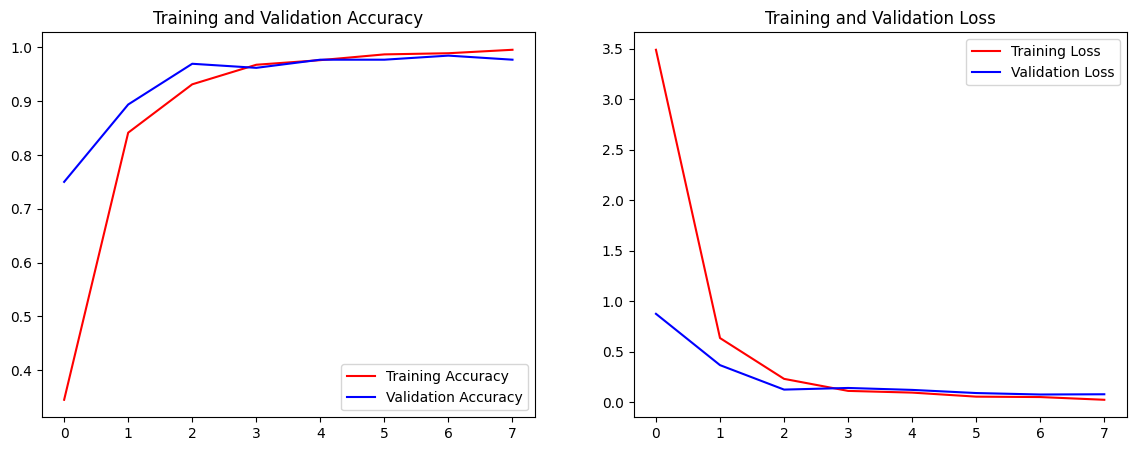

In [ ]:
train_plot(history_tl)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Class-label mapping obtained from `BBC Document Classification Part 1` kernel.

def evaluate(model):

    pred = model.predict(test_images)
    y_pred = np.argmax(pred, axis=1)
    y_true = test_images.classes

    c_mat = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(30, 30))
    hm = sns.heatmap(
        c_mat,
        annot=True,
        fmt="d",
        cmap="YlGnBu",
        cbar=False,
        linecolor="white",
        linewidths=1,
        xticklabels=test_images.class_indices.keys(),
        yticklabels=test_images.class_indices.keys(),
    )

    hm.tick_params(axis='x', labelrotation=45)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted values")
    plt.ylabel("True values")

    print(f"\nAccuracy: {accuracy_score(y_true, y_pred)}")
    print("\nClassification Report\n")
    print(classification_report(y_true, y_pred, target_names=test_images.class_indices.keys()))

    classes = dict(zip(test_images.class_indices.values(), test_images.class_indices.keys()))
    pred_df = pd.DataFrame({"Image Index" : list(range(len(test_images.labels))),
                            "Test Labels" : test_images.labels,
                            "Test Classes" : [classes[i] for i in test_images.labels],
                            "Prediction Labels" : y_pred,
                            "Prediction Classes" : [classes[i] for i in y_pred],
                            "Path": test_images.filenames,
                            "Prediction Probability" : [x for x in np.asarray(tf.reduce_max(model.predict(test_images), axis = 1))]
                               })
    print(pred_df.head(8))

2/2 [==============================] - 26s 6s/step

Accuracy: 0.9245283018867925

Classification Report

                     precision    recall  f1-score   support

Brown-Headed-Barbet       1.00      1.00      1.00         1
       Cattle-Egret       1.00      0.75      0.86         4
  Common-Kingfisher       1.00      1.00      1.00         3
        Common-Myna       0.80      1.00      0.89         4
   Common-Rosefinch       1.00      0.67      0.80         3
  Common-Tailorbird       1.00      1.00      1.00         3
  Coppersmith-Barbe       1.00      1.00      1.00         2
     Forest-Wagtail       1.00      1.00      1.00         3
       Gray-Wagtail       0.80      1.00      0.89         4
         House-Crow       1.00      1.00      1.00         2
   Indian-Grey-Horn       1.00      0.67      0.80         3
     Indian-Peacock       1.00      0.50      0.67         2
       Indian-Pitta       1.00      1.00      1.00         2
      Indian-Roller       1.00      1.00

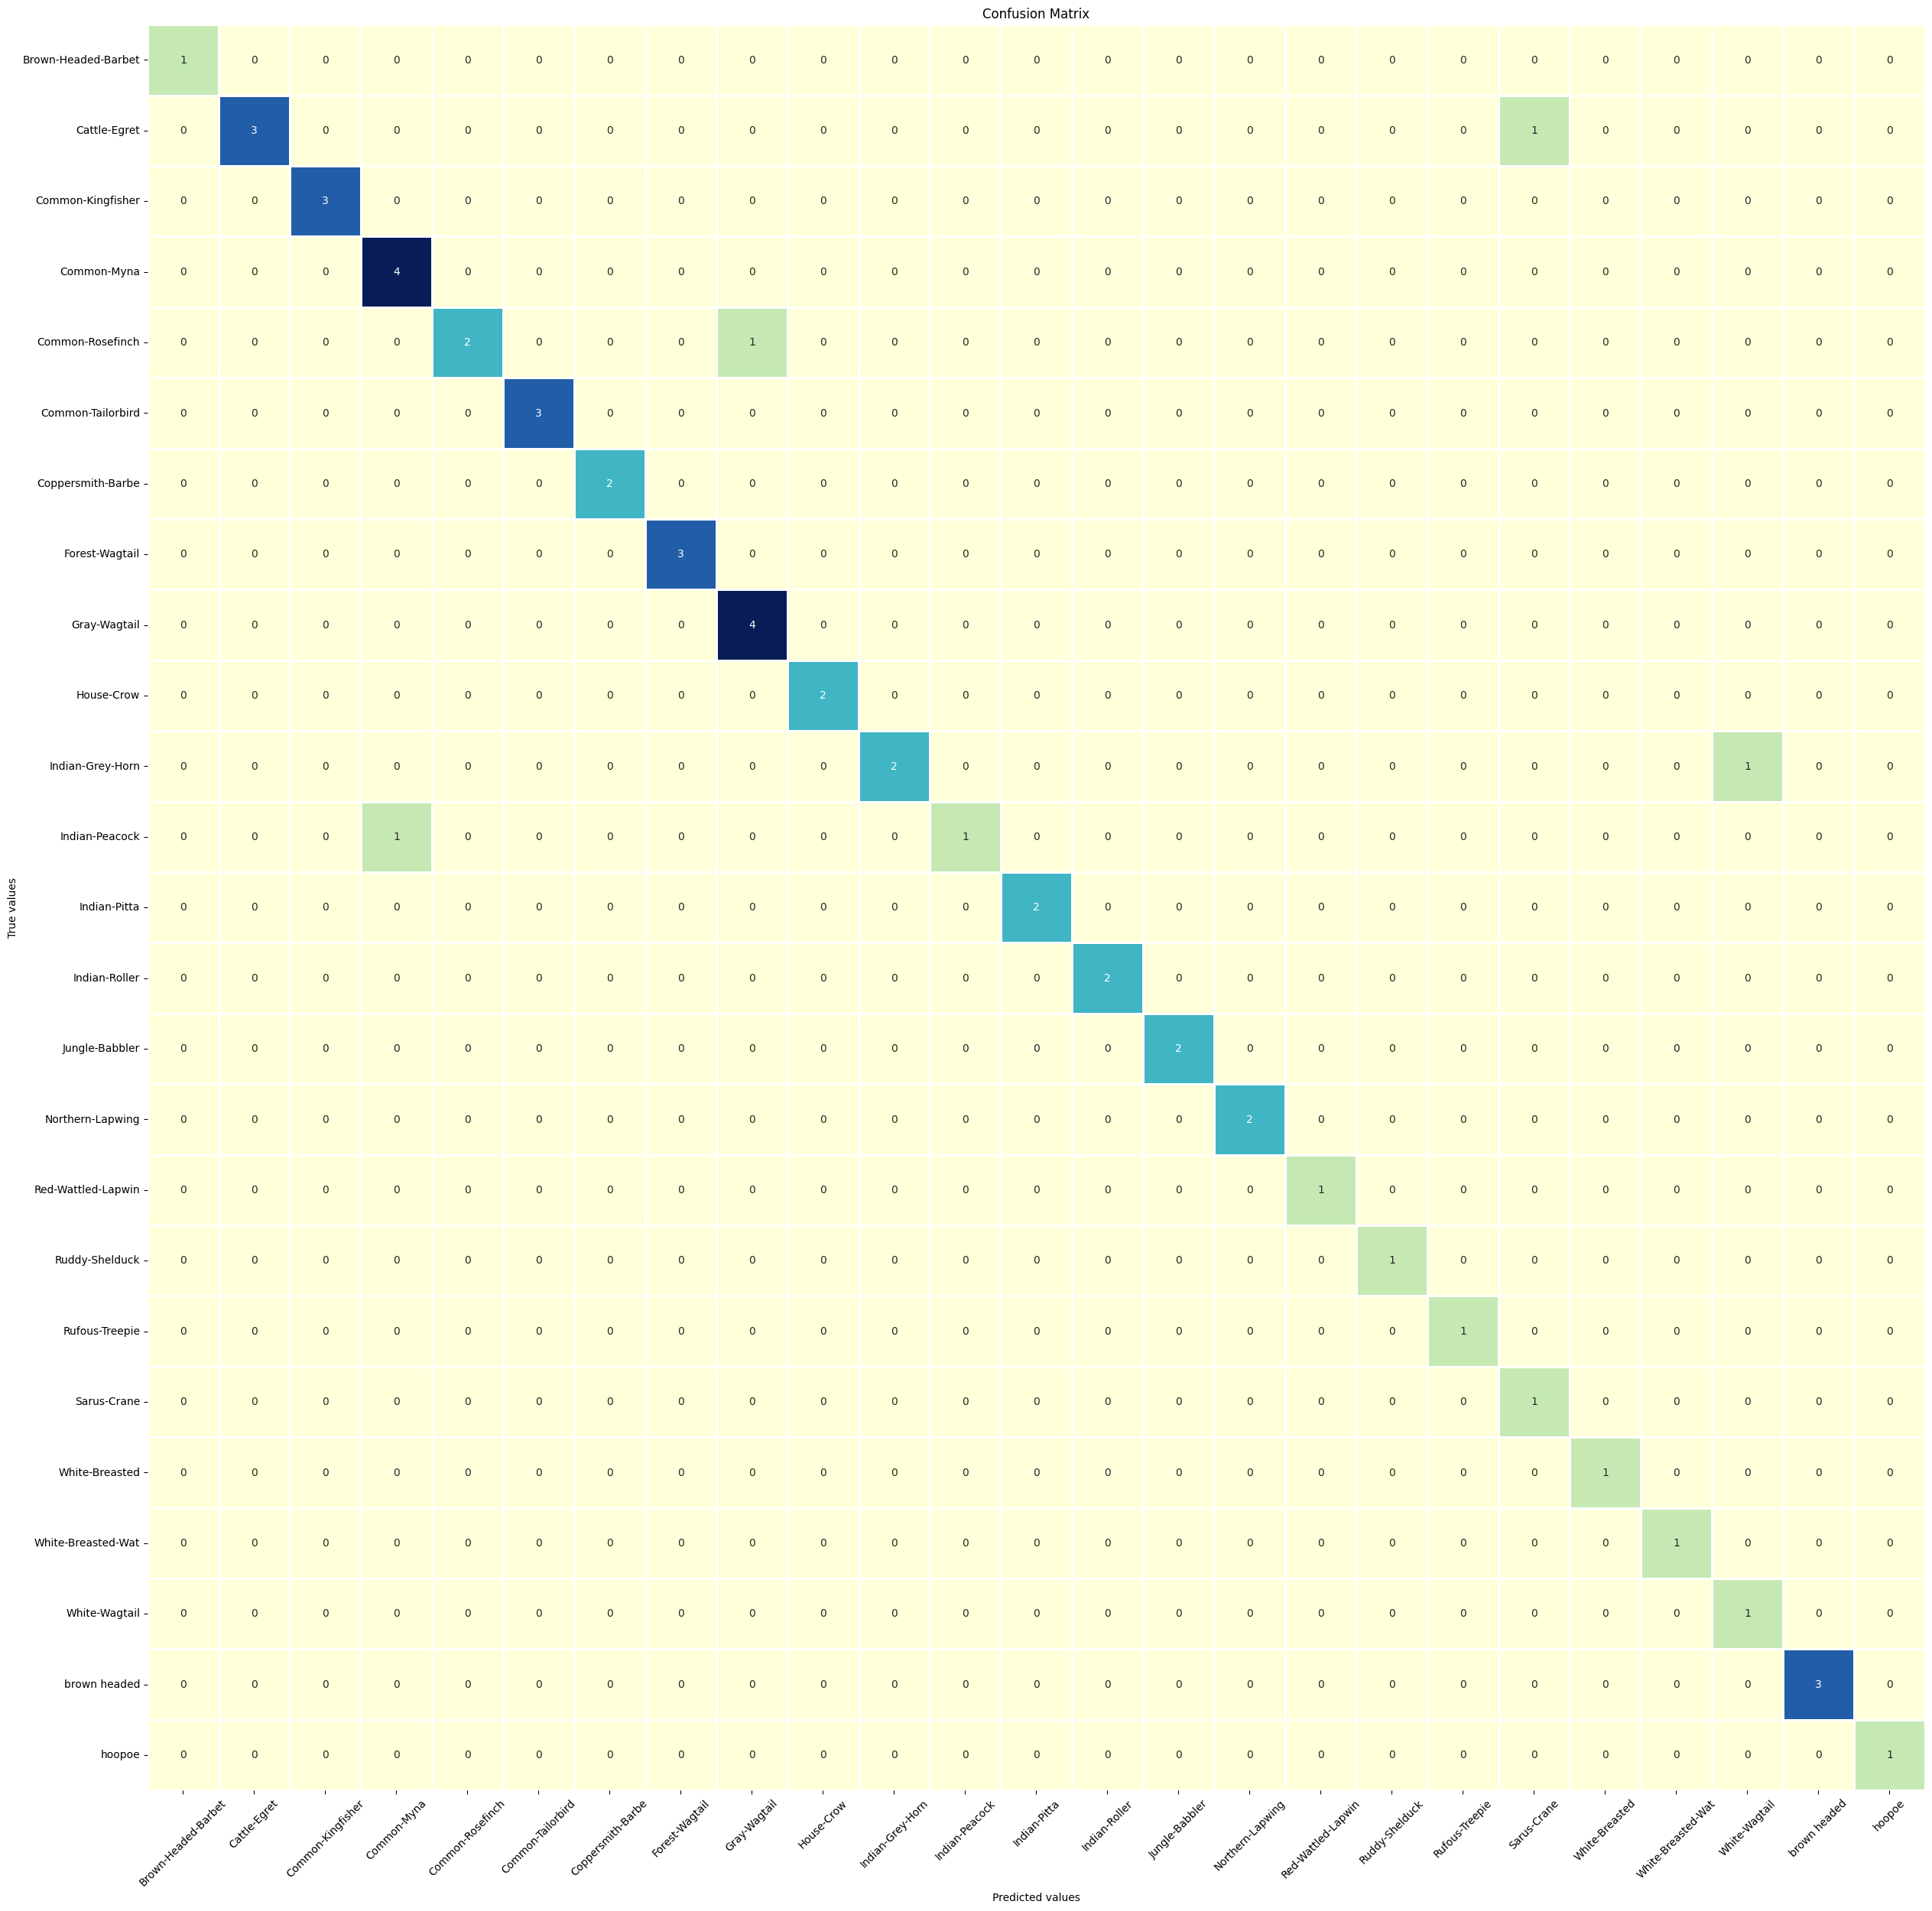

In [ ]:
evaluate(model)

In [ ]:
# Convert model to tf
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path(export_dir + 'birdies_transfer_learning.tflite')
tflite_model_file.write_bytes(tflite_model)

44363596

In [ ]:
%%time

# Load the pretained model
effnet.trainable = True

# Freezing the layers of a pretrained neural network
for i, layer in enumerate(effnet.layers):
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy', f1, precision, recall]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 augmentation_layers (Seque  (None, None, None, None   0         
 ntial)                      )                                   
                                                                 
 efficientnetb3 (Functional  (None, None, None, 1536   10783535  
 )                           )                                   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 1536)        0         
 g2D)                                                            
                                                                 
 dense_4 (Dense)             (None, 3, 3, 256)         393472    
                                                                 
 global_max_pooling2d_2 (Gl  (None, 256)               0         
 obalMaxPooling2D)                                    

In [ ]:
history_ft = model.fit(train_images,
                    steps_per_epoch=len(train_images),
                    validation_data=val_images,
                    validation_steps=len(val_images),
                    epochs=10,
                    verbose=1,
                    callbacks=[callbacks]
                   )

model.save_weights('./saved_model/my_checkpoint_ft')
model.save('./saved_model/final_model_fine_tuned.keras')

Epoch 1/10
15/15 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 1.0000 - f1: 1.0000 - precision: 1.0000 - recall: 1.0000 


Epoch 1: val_accuracy did not improve from 0.98485
15/15 [==============================] - 329s 19s/step - loss: 0.0176 - accuracy: 1.0000 - f1: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0343 - val_accuracy: 0.9848 - val_f1: 0.9589 - val_precision: 0.9875 - val_recall: 0.9375 - lr: 5.0000e-05
Epoch 2/10
15/15 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9936 - f1: 0.9937 - precision: 0.9937 - recall: 0.9937 


Epoch 2: val_accuracy improved from 0.98485 to 1.00000, saving model to ./saved_model/best_weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 281s 19s/step - loss: 0.0153 - accuracy: 0.9936 - f1: 0.9937 - precision: 0.9937 - recall: 0.9937 - val_loss: 0.0186 - val_accuracy: 1.0000 - val_f1: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 5.0000e-05
Epoch 3/10
15/15 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9979 - f1: 0.9989 - precision: 1.0000 - recall: 0.9979 


Epoch 3: val_accuracy did not improve from 1.00000
15/15 [==============================] - 287s 19s/step - loss: 0.0104 - accuracy: 0.9979 - f1: 0.9989 - precision: 1.0000 - recall: 0.9979 - val_loss: 0.0205 - val_accuracy: 0.9924 - val_f1: 0.9968 - val_precision: 1.0000 - val_recall: 0.9937 - lr: 5.0000e-05
Epoch 4/10
15/15 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9957 - f1: 0.9958 - precision: 0.9958 - recall: 0.9958 


Epoch 4: val_accuracy did not improve from 1.00000
15/15 [==============================] - 268s 18s/step - loss: 0.0200 - accuracy: 0.9957 - f1: 0.9958 - precision: 0.9958 - recall: 0.9958 - val_loss: 0.0405 - val_accuracy: 0.9924 - val_f1: 0.9937 - val_precision: 0.9937 - val_recall: 0.9937 - lr: 5.0000e-05
Epoch 5/10
15/15 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9936 - f1: 0.9937 - precision: 0.9937 - recall: 0.9937 


Epoch 5: val_accuracy did not improve from 1.00000
15/15 [==============================] - 292s 20s/step - loss: 0.0117 - accuracy: 0.9936 - f1: 0.9937 - precision: 0.9937 - recall: 0.9937 - val_loss: 0.0132 - val_accuracy: 1.0000 - val_f1: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 5.0000e-05
Epoch 6/10
15/15 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 1.0000 - f1: 0.9989 - precision: 1.0000 - recall: 0.9979 


Epoch 6: val_accuracy did not improve from 1.00000
15/15 [==============================] - 270s 18s/step - loss: 0.0067 - accuracy: 1.0000 - f1: 0.9989 - precision: 1.0000 - recall: 0.9979 - val_loss: 0.0154 - val_accuracy: 1.0000 - val_f1: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 5.0000e-05
Epoch 7/10
15/15 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9979 - f1: 0.9979 - precision: 0.9979 - recall: 0.9979 


Epoch 7: val_accuracy did not improve from 1.00000
15/15 [==============================] - 264s 18s/step - loss: 0.0074 - accuracy: 0.9979 - f1: 0.9979 - precision: 0.9979 - recall: 0.9979 - val_loss: 0.0175 - val_accuracy: 1.0000 - val_f1: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 5.0000e-05
Epoch 8/10
15/15 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9957 - f1: 0.9969 - precision: 0.9979 - recall: 0.9958 
Epoch 8: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.



Epoch 8: val_accuracy did not improve from 1.00000
15/15 [==============================] - 260s 17s/step - loss: 0.0102 - accuracy: 0.9957 - f1: 0.9969 - precision: 0.9979 - recall: 0.9958 - val_loss: 0.0201 - val_accuracy: 1.0000 - val_f1: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 5.0000e-05
Epoch 9/10
15/15 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000 - f1: 1.0000 - precision: 1.0000 - recall: 1.0000 


Epoch 9: val_accuracy did not improve from 1.00000
15/15 [==============================] - 260s 18s/step - loss: 0.0029 - accuracy: 1.0000 - f1: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0178 - val_accuracy: 1.0000 - val_f1: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 1.0000e-05
Epoch 10/10
15/15 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9957 - f1: 0.9958 - precision: 0.9958 - recall: 0.9958 


Epoch 10: val_accuracy did not improve from 1.00000
15/15 [==============================] - 284s 19s/step - loss: 0.0087 - accuracy: 0.9957 - f1: 0.9958 - precision: 0.9958 - recall: 0.9958 - val_loss: 0.0157 - val_accuracy: 1.0000 - val_f1: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 1.0000e-05


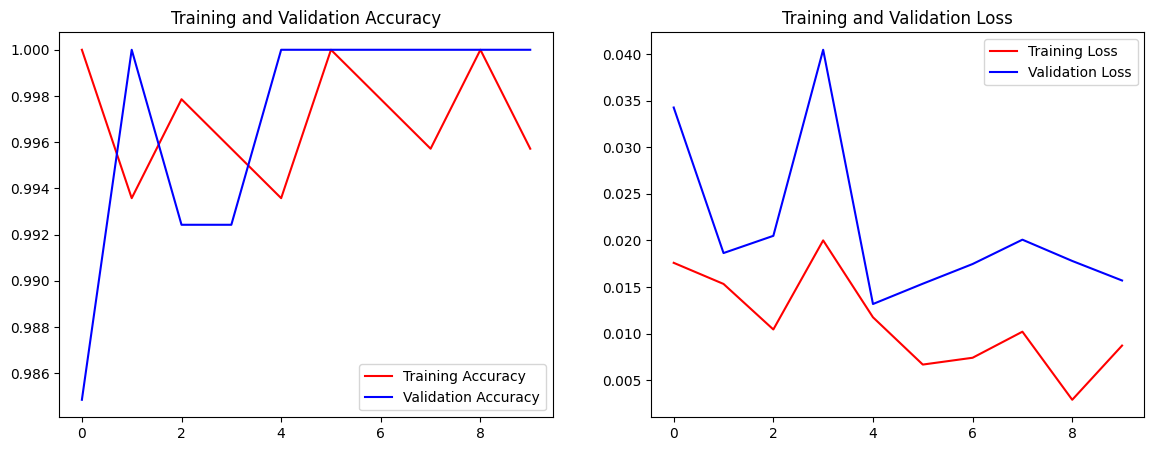

In [ ]:
train_plot(history_ft)

2/2 [==============================] - 15s 2s/step

Accuracy: 0.9811320754716981

Classification Report

                     precision    recall  f1-score   support

Brown-Headed-Barbet       1.00      1.00      1.00         1
       Cattle-Egret       1.00      1.00      1.00         4
  Common-Kingfisher       1.00      1.00      1.00         3
        Common-Myna       0.80      1.00      0.89         4
   Common-Rosefinch       1.00      1.00      1.00         3
  Common-Tailorbird       1.00      1.00      1.00         3
  Coppersmith-Barbe       1.00      1.00      1.00         2
     Forest-Wagtail       1.00      1.00      1.00         3
       Gray-Wagtail       1.00      1.00      1.00         4
         House-Crow       1.00      1.00      1.00         2
   Indian-Grey-Horn       1.00      0.67      0.80         3
     Indian-Peacock       1.00      1.00      1.00         2
       Indian-Pitta       1.00      1.00      1.00         2
      Indian-Roller       1.00      1.00

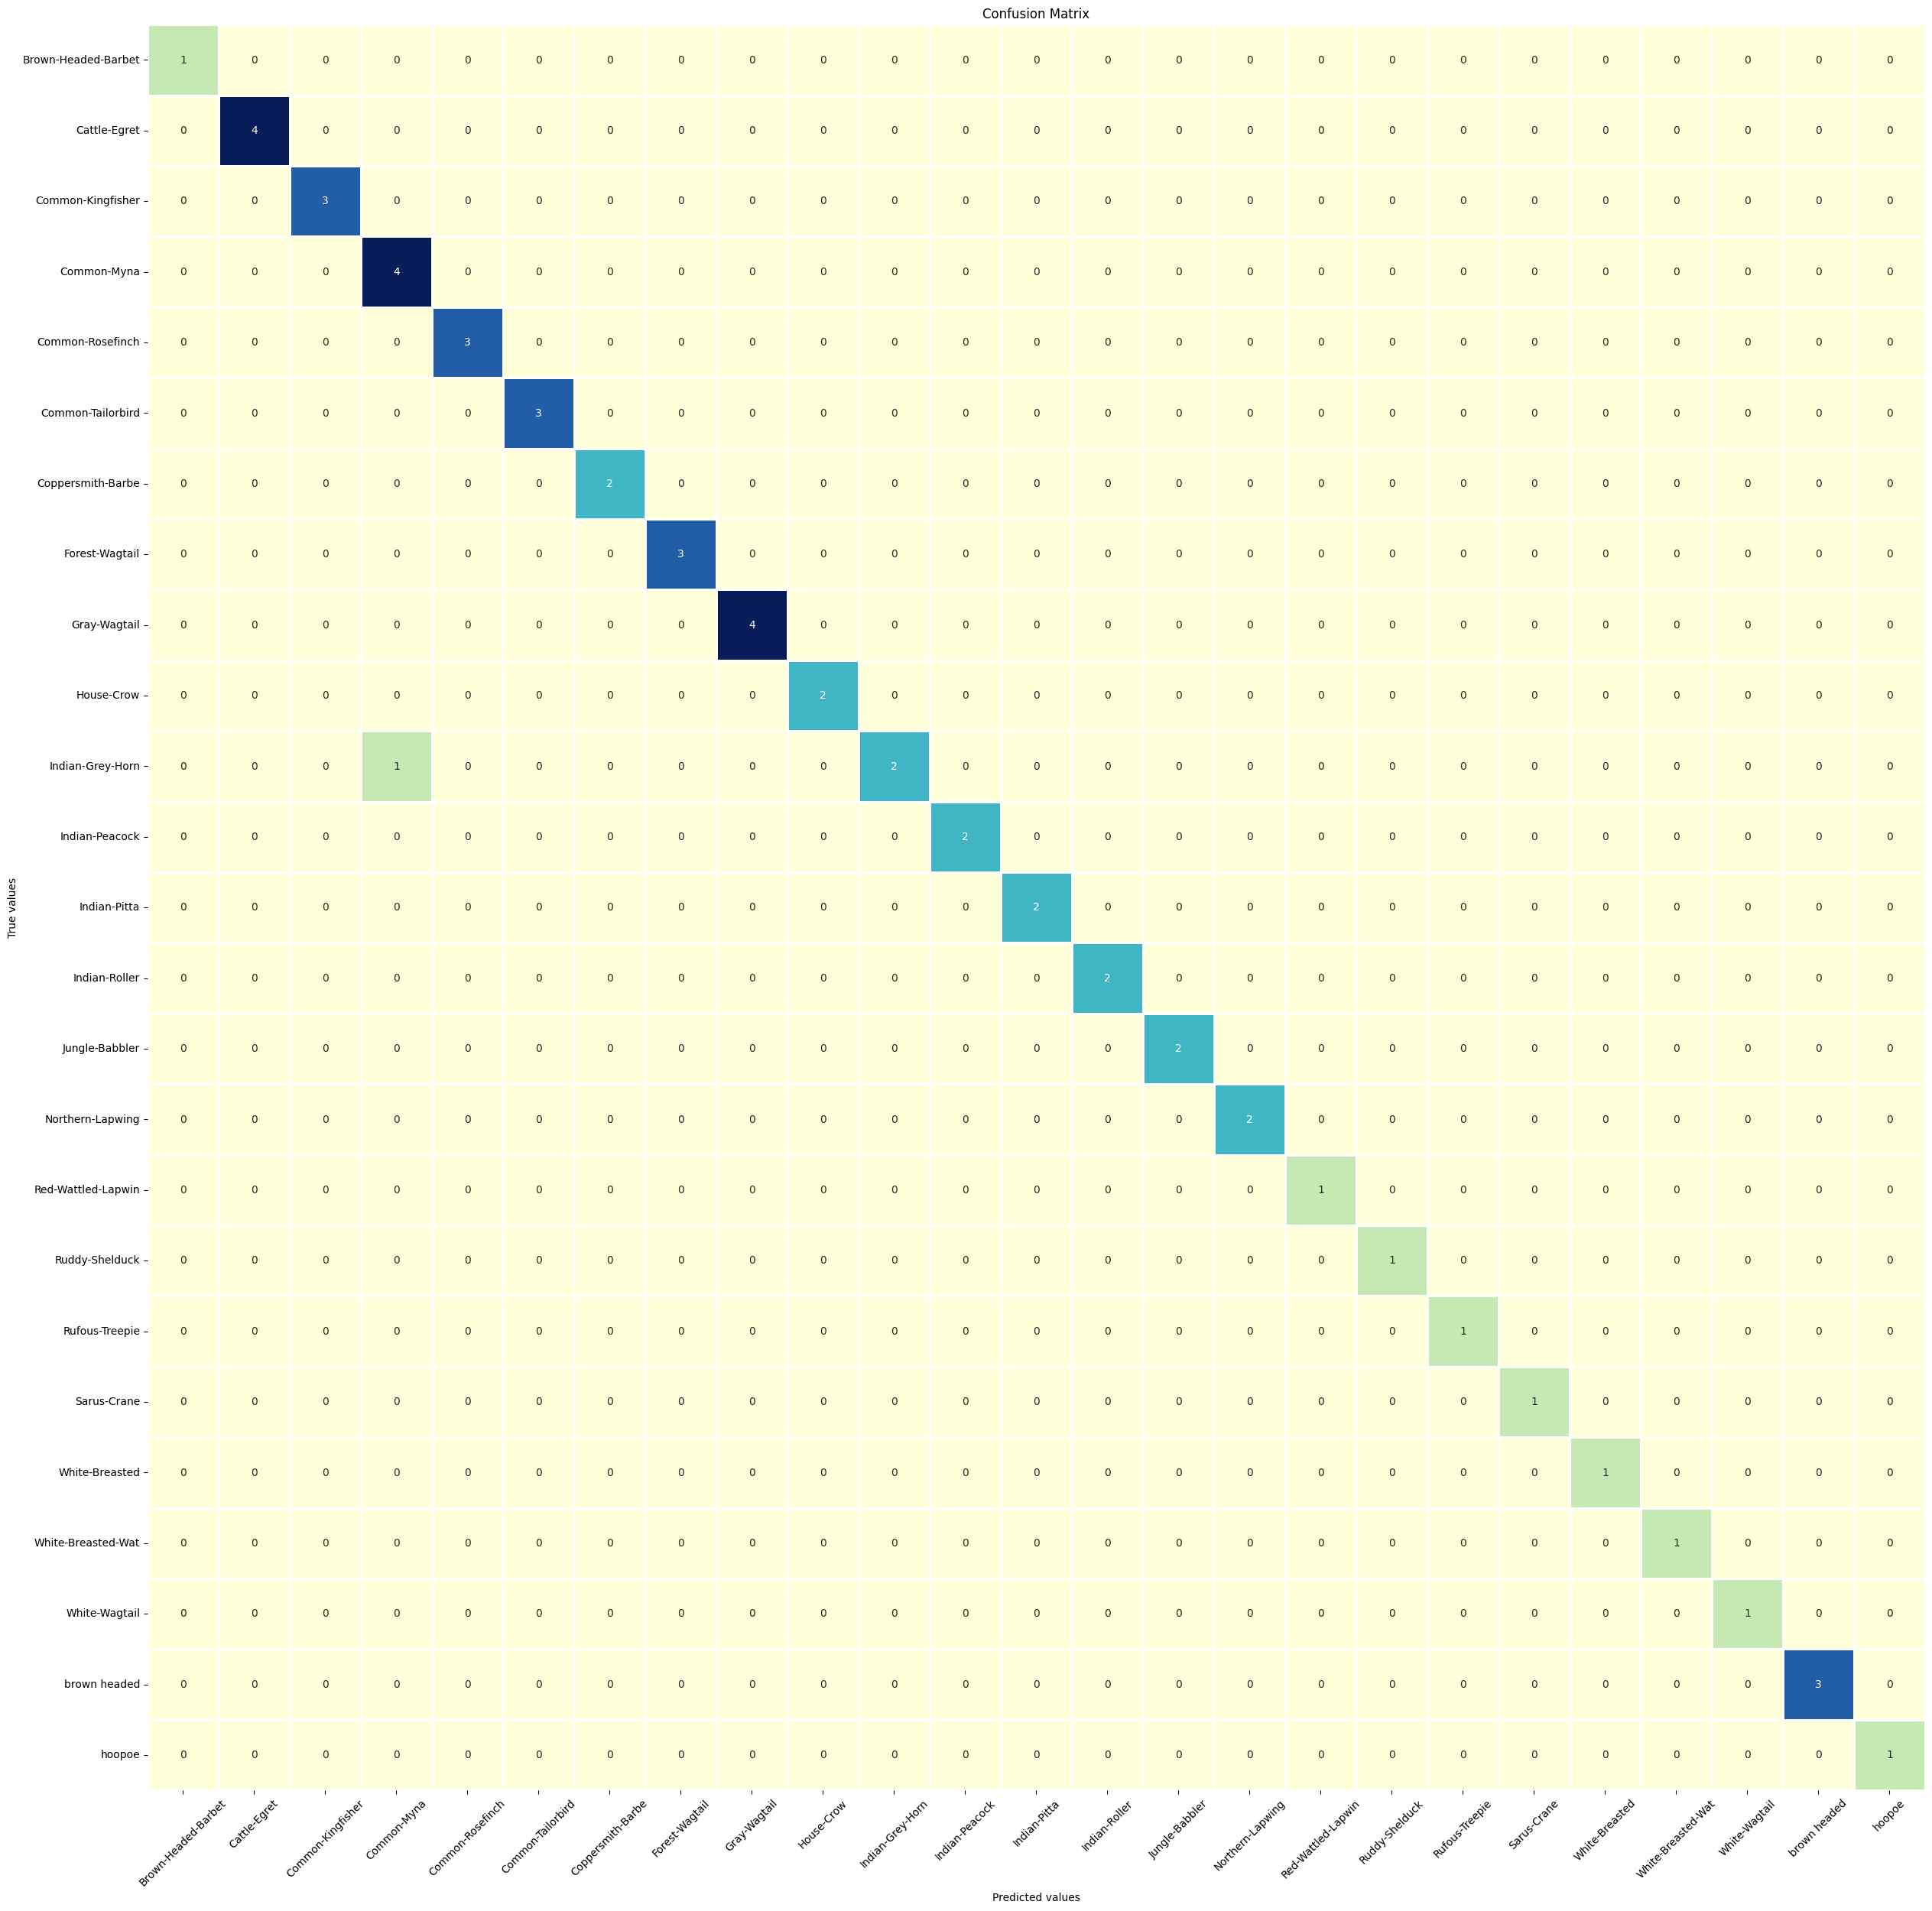

In [ ]:
evaluate(model)

In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path(export_dir + 'birdies_fine_tuned.tflite')
tflite_model_file.write_bytes(tflite_model)

44363596